**Tweet Emotion Recognition: NLP with Tensorflow**

# 1.Introduction

- Our dataset has thousands of tweets, each classified in one off six emotions.
- Our deal is on multi class classification in the natural language processing .
- We'll be using Tensorflow as our machine learning framework.

# 2.Setup and Imports

- Installing Hugging Face's NLP package
- Importing libraries

In [ ]:
# we gonna use this package to extract our dataset for tweet emotion recognition
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 1.4 MB/s eta 0:00:00


In [ ]:
#The %matplotlib inline command embeds the matplotlib plots you produce into the notebook and allows you to create a complete document
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

Let's talk a little bit about **history object**!
>**History object** is commonly used object across many machine learning libraries.
For example, Tensorflow, Keras, PyTorch, and Scikit-learn libraries also use similar objects **to collect and store performance metrics during the training process.** These objects **store information about model performance**, such as **loss and accuracy measurements** obtained during the training process, and can be used to analyze and visualize this information after the training process is completed.




In [ ]:
#function for visualizing the training and validation metrics (accuracy and loss) of a neural network model
def show_history(h):
  epochs_trained = len(h.history['loss'])
  plt.figure(figsize=(16,6))

  plt.subplot(1,2,1)
  plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label= 'Training')
  plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label= 'Validation')
  plt.ylim([0., 1. ]) #defining min and max values of y axis
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

    
  plt.subplot(1, 2, 2)
  plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
  plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()


In [ ]:
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


# 3.Importing Data

- Importing the tweet emotion dataset
- Creating train, validation and test sets
- Extracting tweets and labels from the examples

In [ ]:
dataset = nlp.load_dataset('dair-ai/emotion')
#I'm getting an ConnectionError.I searched little bit, it could be related to my internet speed. So ı'm gonna try to install the data by other ways

ConnectionError: ignored

I was always getting error while trying to reach dataset. I had so many ways, one of them is here.Now the first method, which also gave error in first times, is working:)))

from google.colab import files uploaded = files.upload() import pickle

Dosyayı açın ve veri kümesine yükleyin with open('merged_training.pkl', 'rb') as file: dataset = pickle.load(file)

In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.4 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset("dair-ai/emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [ ]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [ ]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [ ]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[2], labels[2]

('im grabbing a minute to post i feel greedy wrong', 3)

In [ ]:
#unique values of labels list
set(labels)

{0, 1, 2, 3, 4, 5}

You can check https://huggingface.co/datasets/dair-ai/emotion . Each value of our unique values for labels list refer to the specific emotion.




*   0>> sadness
*   1>> enjoy
*   2>> love
*   3>> anger
*   4>> fear
*   5>> surprise









# 4.Tokenizer
All of the words need to be represented as numbers for us to be able to train a machine learning model. So tokenization is doing this process by converting words>>numbers


1.   creating a corpus of all the words that exist in the dataset(corpus:text collection)
2.   give each uniques word a unique corresponding token



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

 ***Out of Vocabulary*** : The OOV token is an essential component for addressing unfamiliar or exceeding vocabulary used during training a model. In this way, when the model encounters unknown words, it can mark them with a generalized "unknown" token or take other action.
For example, if the word in a sentence is a familiar word such as "apple" and "orange", it will be correctly processed and predicted by the model.

***num_words*** : When set to num_words=1000, the tokenizer only considers the most frequent 1000 words and ignores the rest. This can limit the vocabulary and computational load in the training/modeling process.

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token= '<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [ ]:
tweets[0]

'i didnt feel humiliated'

# 5.Padding and Truncating Sequences
- checking length of the tweets
-creating padded sequences

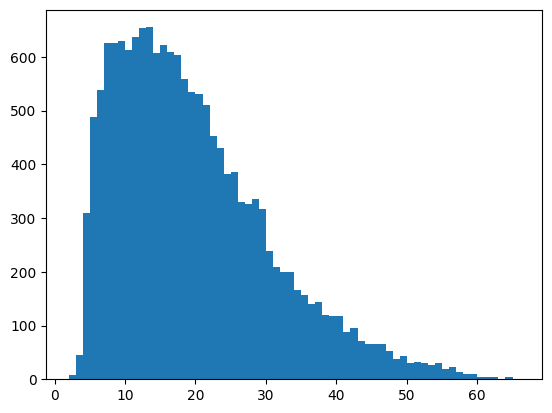

In [ ]:
lengths = [ len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins= len(set(lengths)))  
plt.show()

In [ ]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets) :
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen=maxlen)
  return padded

Let's try to understand what it means by being equal 'post' for truncating and padding???
- When set to 'post', truncation occurs at the end of each sequence. If a sequence's length is greater than maxlen, the extra elements are removed from the end of the sequence.
- When set to 'post', padding is added to the end of each sequence. If a sequence's length is less than maxlen, padding elements (usually zeros) are added to the end of the sequence until it reaches the specified length.

In [ ]:
padded_train_seq= get_sequences(tokenizer, tweets)

In [ ]:
#example: have a look at 20.code block, it will almost give us the same output, the only difference will be about completing with zeros 
#because 'i didn't feel humiliated' is just 4 words, so the rest of 46 words(because of maxlen=50) gonna be complered by zero
# that's exactly what padding='post' does. 
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

# 6.Preparing The Labels
- creating classes to index and index to classes dictionaries
- converting text labels to numeric labels

In [ ]:
#catch the unique labels(emotions)
classes= set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


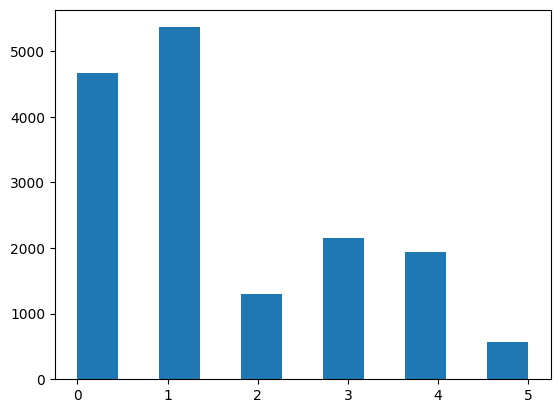

In [ ]:
plt.hist(labels, bins=11)
plt.show()

In [ ]:
#our feelings were already indexed in the data. 
#so we will not do any indexing.
#if the data had not been indexed, we could assign an index to the sentiment values with the codes below.

#class_to_index= dict((c, i) for i, c in enumerate(classes))
#index_to_class= dict((v, k) for k, v in class_to_index.items())
#names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

#7.Creating The Model
- creating the model
- compiling the model

In [ ]:
model = tf.keras.models.Sequential( [
              tf.keras.layers.Embedding(10000, 16, input_length= maxlen),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences= True )),
              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
              tf.keras.layers.Dense(6, activation = 'softmax')
])

In [ ]:
model.compile(
    loss= 'sparse_categorical_crossentropy',
    optimizer= 'adam',
    metrics= ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


some of the links i watched and read to get a simple approach the terms used
- a simple approach to understand how softmax function works : https://youtu.be/8ah-qhvaQqU
- derivative of softmax func: https://www.youtube.com/watch?v=f-nW8cSa_Ec
- lstm : https://medium.com/deep-learning-turkiye/uzun-k%C4%B1sa-vadeli-bellek-lstm-b018c07174a3
- embedding layers: https://www.youtube.com/watch?v=nam2zR7p7Os&t=901s


# 8.Training The Model
- preparing a validation set
- training the model

In [ ]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)


In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model.fit(
    padded_train_seq, labels,
    validation_data=(val_seq, val_labels),
    epochs= 20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)
#givingerror 

ValueError: ignored

In [ ]:
type(val_labels)

list

okayy, we're probably getting this error. because
- type(padded_train_seq) = numpy array
- type(labels) = list
- type(val_seq) = numpy array
- type(val_labels)= list

In [ ]:
labels = np.array(labels)
val_labels = np.array(val_labels)

In [ ]:
h = model.fit(
    padded_train_seq, labels,
    validation_data=(val_seq, val_labels),
    epochs= 20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 49s 73ms/step - loss: 1.2967 - accuracy: 0.4944 - val_loss: 0.7648 - val_accuracy: 0.7320
Epoch 2/20
500/500 [==============================] - 10s 21ms/step - loss: 0.5350 - accuracy: 0.8149 - val_loss: 0.5025 - val_accuracy: 0.8295
Epoch 3/20
500/500 [==============================] - 9s 17ms/step - loss: 0.3009 - accuracy: 0.9028 - val_loss: 0.3980 - val_accuracy: 0.8630
Epoch 4/20
500/500 [==============================] - 11s 23ms/step - loss: 0.2011 - accuracy: 0.9366 - val_loss: 0.3668 - val_accuracy: 0.8765
Epoch 5/20
500/500 [==============================] - 7s 15ms/step - loss: 0.1534 - accuracy: 0.9523 - val_loss: 0.3443 - val_accuracy: 0.8930
Epoch 6/20
500/500 [==============================] - 9s 17ms/step - loss: 0.1284 - accuracy: 0.9590 - val_loss: 0.4428 - val_accuracy: 0.8815
Epoch 7/20
500/500 [==============================] - 9s 19ms/step - loss: 0.1039 - accuracy: 0.9666 - val_loss: 0.3706 - val_accuracy: 0.8

#9.Evaluating The Model
- visualizing training history
- preparing a test set
- look at individual predictions on the test set
- look at all predictions on the test set

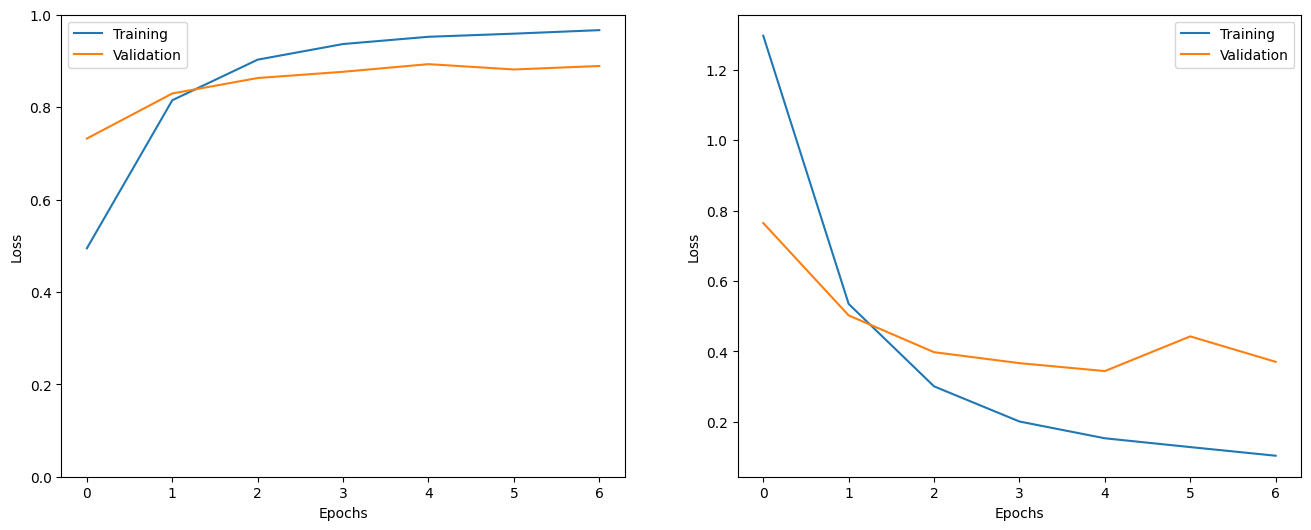

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)

In [ ]:
type(test_labels)

list

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 12ms/step - loss: 0.3914 - accuracy: 0.8800


In [ ]:
i = random.randint(0, len(test_labels)-1)

print('Sentence: ', test_tweets[i])
print('Emotion: ', test_labels[i])


p= model.predict(np.expand_dims(test_seq[i], axis=0)) [0]
pred_emotion = np.argmax(p).astype('uint8')
print('Predicted Emotion: ', pred_emotion)

Sentence:  i was so impressed with the show especially for hs and i was moved by these talented kids but then again i feel very passionate about productions and music and theatre in schools so i am always happy to endorse many hs productions throughout their seasons during this time
Emotion:  2
1/1 [==============================] - 0s 21ms/step
Predicted Emotion:  5


In [ ]:
preds = np.argmax(model.predict(test_seq), axis=-1)

63/63 [==============================] - 1s 10ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
accuracy_score(test_labels, preds)

0.88

In [ ]:
classification_report(preds, test_labels)

'              precision    recall  f1-score   support\n\n           0       0.92      0.95      0.93       562\n           1       0.89      0.93      0.91       668\n           2       0.82      0.72      0.77       183\n           3       0.85      0.85      0.85       276\n           4       0.89      0.81      0.85       248\n           5       0.61      0.63      0.62        63\n\n    accuracy                           0.88      2000\n   macro avg       0.83      0.81      0.82      2000\nweighted avg       0.88      0.88      0.88      2000\n'

In [ ]:
cm = confusion_matrix(preds, test_labels)

<Axes: >

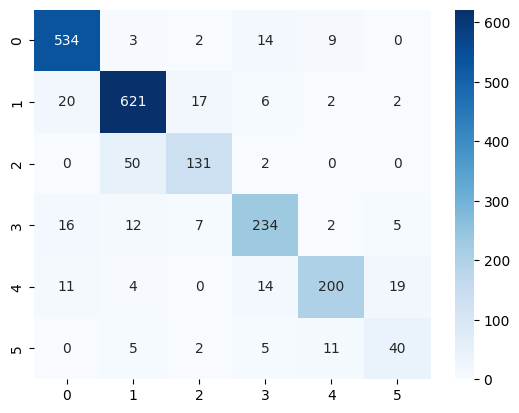

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")


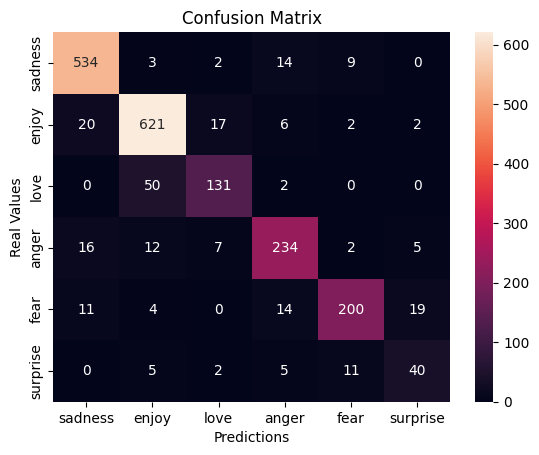

In [ ]:
name_of_emotions = ['sadness', 'enjoy', 'love', 'anger', 'fear', 'surprise']
sns.heatmap(cm, annot=True,fmt='d', xticklabels= name_of_emotions, yticklabels=name_of_emotions)
plt.xlabel("Predictions")
plt.ylabel("Real Values")
plt.title("Confusion Matrix")
plt.show()

we can make some comments as below by looking confusion matrix
there are 50 outputs>> its real value is love, but model says 'enjoy'
